## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [2]:
print('No of samples in training dataset: ',len(x_train))

print('No of samples in test dataset: ',len(x_test))

No of samples in training dataset:  60000
No of samples in test dataset:  10000


In [3]:
""

''

### Find dimensions of an image in the dataset

In [4]:
print(x_train[0].shape)
print(x_test[0].shape)

(28, 28)
(28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
y_train = to_categorical(y_train, num_classes= 10)
y_test=  to_categorical(y_test, num_classes = 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [7]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32') 
x_train/=255
x_test/=255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [8]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

### Import the necessary layers from keras to build the model

In [9]:
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape, Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [10]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

 callback=EarlyStopping(monitor='loss',patience=5)

model.compile(optimizer='adam',loss=losses.categorical_crossentropy,metrics=['accuracy']) 

model.fit(x_train,y_train,epochs=10,callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3690 - accuracy: 0.8669
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2267 - accuracy: 0.9163
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1627 - accuracy: 0.9394
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1128 - accuracy: 0.9586
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0744 - accuracy: 0.9725
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0484 - accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0377 - accuracy: 0.9863
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0265 - accuracy: 0.9907
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0209 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [14]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))

model.add(layers.Dense(10,activation='softmax')) 

 callback=EarlyStopping(monitor='loss',patience=5)

model.compile(optimizer='adam',loss=losses.categorical_crossentropy,metrics=['accuracy']) 

model.fit(x_train,y_train,epochs=10,callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4035 - accuracy: 0.8536
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2603 - accuracy: 0.9044
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2143 - accuracy: 0.9198
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1822 - accuracy: 0.9325
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1520 - accuracy: 0.9422
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1310 - accuracy: 0.9504
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1123 - accuracy: 0.9585
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0954 - accuracy: 0.9646
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0828 - accuracy: 0.9692
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.074

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

datagen = ImageDataGenerator(horizontal_flip=True,  width_shift_range=0.2, height_shift_range=0.2,  rotation_range=30, shear_range=0.2, zoom_range=0.3)

model.fit(datagen.flow(x_train, y_train, batch_size = 3000), validation_data = (x_test, y_test),steps_per_epoch = len(x_train) // 3000, epochs = 10, callbacks=[ callback])

Epoch 1/10
20/20 [==============================] - 13s 626ms/step - loss: 0.7839 - accuracy: 0.7107 - val_loss: 0.4886 - val_accuracy: 0.8267
Epoch 2/10
20/20 [==============================] - 12s 625ms/step - loss: 0.7626 - accuracy: 0.7170 - val_loss: 0.5016 - val_accuracy: 0.8257
Epoch 3/10
20/20 [==============================] - 12s 618ms/step - loss: 0.7507 - accuracy: 0.7214 - val_loss: 0.4882 - val_accuracy: 0.8292
Epoch 4/10
20/20 [==============================] - 12s 617ms/step - loss: 0.7466 - accuracy: 0.7221 - val_loss: 0.4946 - val_accuracy: 0.8257
Epoch 5/10
20/20 [==============================] - 13s 627ms/step - loss: 0.7339 - accuracy: 0.7287 - val_loss: 0.4884 - val_accuracy: 0.8269
Epoch 6/10
20/20 [==============================] - 12s 610ms/step - loss: 0.7251 - accuracy: 0.7326 - val_loss: 0.4821 - val_accuracy: 0.8315
Epoch 7/10
20/20 [==============================] - 12s 618ms/step - loss: 0.7174 - accuracy: 0.7348 - val_loss: 0.4810 - val_accuracy: 0.8349

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

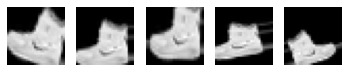

In [21]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [34]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size = 3000), validation_data = (x_test, y_test),steps_per_epoch = len(x_train) // 3000, epochs = 10, callbacks=[ callback])

Epoch 1/10
20/20 [==============================] - 11s 572ms/step - loss: 0.9948 - accuracy: 0.6377 - val_loss: 0.4901 - val_accuracy: 0.8251
Epoch 2/10
20/20 [==============================] - 11s 571ms/step - loss: 0.8095 - accuracy: 0.6993 - val_loss: 0.5112 - val_accuracy: 0.8172
Epoch 3/10
20/20 [==============================] - 11s 575ms/step - loss: 0.7575 - accuracy: 0.7202 - val_loss: 0.4924 - val_accuracy: 0.8295
Epoch 4/10
20/20 [==============================] - 12s 576ms/step - loss: 0.7362 - accuracy: 0.7303 - val_loss: 0.4972 - val_accuracy: 0.8262
Epoch 5/10
20/20 [==============================] - 12s 580ms/step - loss: 0.7216 - accuracy: 0.7357 - val_loss: 0.4915 - val_accuracy: 0.8285
Epoch 6/10
20/20 [==============================] - 12s 588ms/step - loss: 0.7062 - accuracy: 0.7422 - val_loss: 0.4791 - val_accuracy: 0.8351
Epoch 7/10
20/20 [==============================] - 12s 594ms/step - loss: 0.6899 - accuracy: 0.7470 - val_loss: 0.4867 - val_accuracy: 0.8324

###  Report the final train and validation accuracy

In [25]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.4838 - accuracy: 0.8297


In [26]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4134 - accuracy: 0.8502


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


### **Load CIFAR10 dataset**

In [30]:
from tensorflow.keras.datasets import cifar10

(x_train_cifar,y_train_cifar),(x_test_cifar,y_test_cifar)=cifar10.load_data() 

In [44]:
x_train_cifar=x_train_cifar.astype('float32')
x_train_cifar/=255 

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [45]:
datagen_cifar = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, width_shift_range=0.2,height_shift_range=0.2,rotation_range=30,shear_range=0.2,data_format='channels_last') 

### **Prepare/fit the generator.**

In [46]:
datagen_cifar.fit(x_train_cifar)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

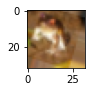

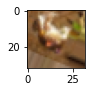

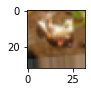

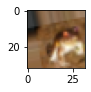

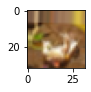

In [47]:
gen = datagen_cifar.flow(x_train_cifar[0:1], batch_size=1)
for i in range(1, 6):
  plt.subplot(1,5,i)
  plt.axis("on")
  plt.imshow(gen.next().squeeze())
  plt.plot()
  plt.show()